# Drug Discovery

Esse *notebook* foi elaborado com base na semana Imersão Dados produzido pela [Alura](https://www.alura.com.br/). 

O projeto foi inspirado no desafio *[Laboratory Innovation Science at Havard](https://www.kaggle.com/c/lish-moa)* disponibilizado pelo Kaggle. 

<p align=center>
<img src="https://www.bruker.com/pt/applications/pharma/drug-discovery/_jcr_content/root/overviewstage/desktopImage.coreimg.82.1920.jpeg/1601952541339/drug-discovery-banner.jpeg" width="30%"></p>

O desafio tem como objetivo o avanço do desenvolvimento de medicamentos através de melhorias nos algoritmos de previsão do ***MoA*** (Mechanism of Action). O MoA nada mais é do que uma abreviação para descrever a atividade biológica de uma determinada molécula. Essa molécula é a que os cientistas desejam desenvolver para combater uma determinada doença. 

Os dados abordados aqui são baseados em uma tecnologia que mede, ao mesmo tempo e nas mesmas amostras, as respostas das células humanas aos medicamentos. 

In [1]:
import pandas as pd

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')
dados

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,...,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,...,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,...,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740


Cada linha do *dataset* é um experimento, que foi feito em um certo tempo e com uma certa droga. Para saber isso mais ao certo tem que explorar cada uma das colunas. 

Cada linha é uma cultura de célula que foi submetida a alguma droga. 

* Ver primeiras 5 entradas

In [2]:
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


* Ver últimas 5 entradas

In [3]:
dados.tail()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,...,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,...,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,...,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,...,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


* Tamanho do conjunto de dados

In [4]:
dados.shape

(23814, 877)

* Informações únicas na coluna `Tratamento`

In [5]:
dados['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

Na coluna tratamento há duas espeficicações possíveis: Com droga e com controle. 

"Com droga" é basicamente submeter o grupo de células a um tratamento para ver qual é a reação dele. Já o "com controle" é submetido as mesmas condições do grupo de tratamento, exceto uma, isso é para saber qual a influência daquela condição no todo, se é positivo tirar ela, se é negativo ou se nem faz diferença. Serve para isolar e ver o que acontece com aquela variável que quer estudar. Nesse caso utiliza-se o controle para saber se o resultado que está sendo obtido é realmente da droga (remédio) aplicada ou não. 

* Informações únicas na coluna `Tempo`

In [6]:
dados['tempo'].unique()

array([24, 72, 48])

Depois de aplicar a droga no grupo de células são dados alguns prazos para que saiba a reação ou a falta de reação. É dado um tempo de 24, 48 e 72 horas. São dados vários prazos para ter real certeza dos resultados, porque, por exemplo, pode dar o prazo apenas de 24 horas e ver que o grupo de células não teve nenhum resultado, se assumir que aquela droga não surte efeito pode ser inválido, porque pode significar que apenas não deu tempo da droga agir na célula. 

São os tempos de exposição antes de fazer as medidas.

* Informações únicas na coluna `Dose`

In [7]:
dados['dose'].unique()

array(['D1', 'D2'], dtype=object)

Com os resultados obtidos imagina-se que D1 é uma dose menor e D2 é uma dose maior. Não tem essa informação ao certo, mas é o que se pode supor pela forma que eles são apresentados. 

* Informações únicas na coluna `Droga`

In [8]:
dados['droga'].unique()

array(['b68db1d53', 'df89a8e5a', '18bb41b2c', ..., '573c787a2',
       'b2fe3eca7', 'dd4a96d16'], dtype=object)

Parece que os dados reais da droga foram anonimizados para não ter nenhum viés ao analisar os dados. A partir do momento que se sabe qual droga é, tem a expectativa do resultado e não pode ter esse viés ao analisar os dados.

In [9]:
drug_quantity = len(dados['droga'].unique())
print(f'Foram investigados {drug_quantity} tipos de drogas (remédios)')

Foram investigados 3289 tipos de drogas (remédios)


* Informações únicas na coluna `g-0`

In [10]:
dados['g-0'].unique()

array([ 1.062 ,  0.0743,  0.628 , ...,  0.3942,  0.666 , -0.8598])

O G está relacionado com a parte de genética, analisou alguns genes, tem ali as partes dos genes. Os valores obtidos são a expressão de cada um dos genes frente a droga (a exposição ou dose).

O que é essa expressão? Primeiro de tudo temos que lembrar a estrutura da célula, temos a membrana citoplasmatica, que separa o interior de célula, da parte externa. Dentro da célula tem o núcleo, dentro dele tem o DNA sendo protegido. Trechos desse DNA terão a receita para sintetizar uma proteina, para poder fazer isso tem que fazer um intermediário, que é o chamado RNA mensageiro. É o RNA mensageiro porque a proteína será sintetizada fora do núcleo, então o RNA tem a função de passar as informações de dentro para fora. O normal é que sejam 4 RNA's, que é a **expressão gênica**, pode ter mais ou menos RNA's depende do estímulo que está sendo sofrido. Nesse caso os estímulos são as drogas aplicadas, que podem servir para aumentar ou diminuir. 

Sabendo disso tudo e olhando os números únicos da coluna G-0 percebe-se que os valores estão quebrados e que então, na verdade, eles estão normalizados. A normalização é feita para poder colocar todos os valores dentro de uma mesma faixa, sendo possível uma melhor comparação e para retirar algum efeito não desejado, algum efeito não biológico. 

In [11]:
dados['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

Suspeita-se que a disparidade entre os valores "com_controle" para os "com_droga" seja porque o "com_controle" é apenas para certificação de que é a droga que realmente está impactando nos resultados, então estatisticamente não é necessário um valor muito alto para ter essa certeza. Além disso é mais vantagem que se tenha a maior quantidade possível de resultados com a droga para saber os efeitos, para saber se ela realmente poderá ser utilizada.

In [12]:
#Proporção 
with_drug = dados['tratamento'].value_counts()[0]
for_control = dados['tratamento'].value_counts()[1]
print(f'Os grupos de células que foram submetidos apenas a drogas representam {with_drug/dados.shape[0]:.2f} %')
print(f'Os grupos de células do grupo de controle representam {for_control/dados.shape[0]:.2f} %')

Os grupos de células que foram submetidos apenas a drogas representam 0.92 %
Os grupos de células do grupo de controle representam 0.08 %


In [13]:
dados['dose'].value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

Em relação a quantidade de doses que foram aplicadas durante o experimento, já é perceptível que há um balanceamento nessa quantidade. O que mostra uma homogeneidade de aplicações. 

In [14]:
dados['tratamento'].value_counts(normalize = True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

Com os dados normalizados é possível ver a desproporção dos dados da coluna `tratamento`. 

O mesmo será feito com a coluna `dose`.

In [15]:
dados['dose'].value_counts(normalize = True)

D1    0.510078
D2    0.489922
Name: dose, dtype: float64

Percebe-se a diferença de balanceamentos.

Para ver isso de forma ainda mais clara serão traçados alguns gráficos.

In [16]:
dados['tratamento'].value_counts().index

Index(['com_droga', 'com_controle'], dtype='object')

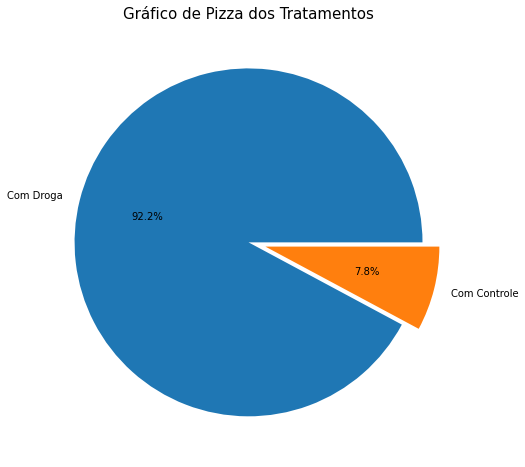

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,8))
ax.pie(dados['tratamento'].value_counts(), labels = ['Com Droga', 'Com Controle'], autopct='%1.1f%%', explode = [0, 0.1])
ax.set_title('Gráfico de Pizza dos Tratamentos', fontdict={'fontsize': 15});

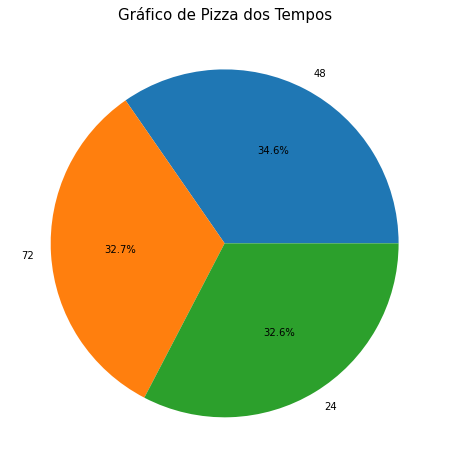

In [18]:
fig, ax = plt.subplots(figsize=(16,8))
ax.pie(dados['tempo'].value_counts(), labels = dados['tempo'].value_counts().index, autopct='%1.1f%%')
ax.set_title('Gráfico de Pizza dos Tempos', fontdict={'fontsize': 15});

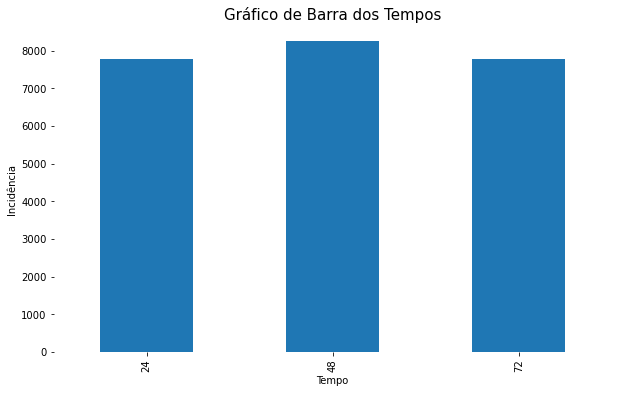

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
dados['tempo'].value_counts().sort_index().plot.bar()
ax.set_title('Gráfico de Barra dos Tempos', fontdict={'fontsize': 15})
ax.set_xlabel('Tempo', fontdict={'fontsize': 10})
ax.set_ylabel('Incidência', fontdict={'fontsize': 10})
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False);

Com o gráfico de barras é possível visualizar com mais facilidade qual tempo teve maior frequência nos dados. Ele acaba sendo mais útil do que o gráfico de pizza, que serve mais para dar noção do todo, mas não é muito preciso. 

Na coluna `g-0` tem valores dentro de um intervalo definido, a fim de evitar valores muito distantes entre si e considerando que os dados já foram normalizados, serão pegos apenas os valores maiores do que 0. 

In [20]:
for i in range(len(dados.columns[5:])):
    old_name = str(dados.columns[5:][i])
    new_name = str(dados.columns[5:][i].split('-')[0] + ' ' + dados.columns[5:][i].split('-')[1])
    dados = dados.rename(columns={old_name: new_name})

In [21]:
dados.head()

,id,tratamento,tempo,dose,droga,g 0,g 1,g 2,g 3,g 4,...,c 90,c 91,c 92,c 93,c 94,c 95,c 96,c 97,c 98,c 99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [22]:
dados_filtrados = dados[dados['g 0'] > 0]
dados_filtrados.head()

,id,tratamento,tempo,dose,droga,g 0,g 1,g 2,g 3,g 4,...,c 90,c 91,c 92,c 93,c 94,c 95,c 96,c 97,c 98,c 99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000,-1.5390,5.9440,-2.1670,...,0.1855,1.1720,0.8325,0.6486,0.8090,1.5880,2.4670,0.0357,0.1351,-0.3179
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,...,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260


## Resumo dos dados

Até esse ponto foi possível perceber alguns pontos:

* Há um desbalanceamento na coluna `tratamento`;
* Há diversas colunas informando sobre a expressão genética das drogas;
* A coluna tempo informa o tempo de análise para ver se a droga teve reação ou não;
* O gráfico de pizza não foi muito informativo, mas o gráfico de barra conseguiu mostrar que o tempo mais recorrente de análise é o de 48 horas; 
* A partir da coluna `g 0` os dados estão normalizados.